In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import json

# Update paths to Kaggle directories
lumbar_test_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_Lumbar_Error/test_ids.json"
lumbar_train_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_Lumbar_Error/train_ids.json"
lumbar_val_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_Lumbar_Error/val_ids.json"
lumbar_labels_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Labels/labels_lumbar_error.json"

torso_test_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_TorsoAngle_Error/test_ids.json"
torso_train_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_TorsoAngle_Error/train_ids.json"
torso_val_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Splits/Splits_TorsoAngle_Error/val_ids.json"
torso_labels_path = "/kaggle/input/capstonebarbell/Capstone_Barbell/Labels/labels_torso_angle_error.json"

# Load the data splits and labels
with open(lumbar_test_path, 'r') as file:
    lumbar_test_ids = json.load(file)
with open(lumbar_train_path, 'r') as file:
    lumbar_train_ids = json.load(file)
with open(lumbar_val_path, 'r') as file:
    lumbar_val_ids = json.load(file)
with open(lumbar_labels_path, 'r') as file:
    lumbar_labels = json.load(file)

with open(torso_test_path, 'r') as file:
    torso_test_ids = json.load(file)
with open(torso_train_path, 'r') as file:
    torso_train_ids = json.load(file)
with open(torso_val_path, 'r') as file:
    torso_val_ids = json.load(file)
with open(torso_labels_path, 'r') as file:
    torso_labels = json.load(file)

# Base path for images
base_image_path = "/kaggle/input/barbellrowfull/barbellrow_images_raw/"

# ... (rest of the data preprocessing remains the same)

# Prepare image paths and labels for lumbar error
lumbar_train_images = [base_image_path + id + ".jpg" for id in lumbar_train_ids]
lumbar_train_labels = [str(lumbar_labels[id]) for id in lumbar_train_ids]

lumbar_val_images = [base_image_path + id + ".jpg" for id in lumbar_val_ids]
lumbar_val_labels = [str(lumbar_labels[id]) for id in lumbar_val_ids]

lumbar_test_images = [base_image_path + id + ".jpg" for id in lumbar_test_ids]
lumbar_test_labels = [str(lumbar_labels[id]) for id in lumbar_test_ids]

# Prepare image paths and labels for torso angle error
torso_train_images = [base_image_path + id + ".jpg" for id in torso_train_ids]
torso_train_labels = [str(torso_labels[id]) for id in torso_train_ids]

torso_val_images = [base_image_path + id + ".jpg" for id in torso_val_ids]
torso_val_labels = [str(torso_labels[id]) for id in torso_val_ids]

torso_test_images = [base_image_path + id + ".jpg" for id in torso_test_ids]
torso_test_labels = [str(torso_labels[id]) for id in torso_test_ids]

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Image preprocessing parameters
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerators for lumbar and torso errors
datagen = ImageDataGenerator(rescale=1./255)  # Rescale images to [0,1]

# Lumbar error generators
lumbar_train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": lumbar_train_images, "label": lumbar_train_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size
)

lumbar_val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": lumbar_val_images, "label": lumbar_val_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size
)

# Torso error generators
torso_train_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": torso_train_images, "label": torso_train_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size
)

torso_val_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": torso_val_images, "label": torso_val_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size
)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 10360 validated image filenames belonging to 2 classes.
Found 2227 validated image filenames belonging to 2 classes.
Found 11881 validated image filenames belonging to 2 classes.
Found 2564 validated image filenames belonging to 2 classes.


In [2]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

def create_simple_model():
    base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    predictions = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create models for lumbar and torso errors without the custom metrics
lumbar_model = create_simple_model()
torso_model = create_simple_model()


94668760/94668760 [==============================] - 3s 0us/step


In [3]:

epochs = 10  # You can adjust this value based on your needs

# Train lumbar model
lumbar_model_history = lumbar_model.fit(
    lumbar_train_generator,
    validation_data=lumbar_val_generator,
    epochs=epochs,
)

# Train torso model
torso_model_history = torso_model.fit(
    torso_train_generator,
    validation_data=torso_val_generator,
    epochs=epochs,
)
# Save the lumbar error model
lumbar_model.save("/kaggle/working/lumbar_model.h5")

# Save the torso angle error model
torso_model.save("/kaggle/working/torso_model.h5")


Epoch 1/10
324/324 [==============================] - 124s 351ms/step - loss: 0.4623 - accuracy: 0.8333 - val_loss: 0.4391 - val_accuracy: 0.8464
Epoch 2/10
324/324 [==============================] - 29s 90ms/step - loss: 0.3359 - accuracy: 0.8647 - val_loss: 0.3735 - val_accuracy: 0.8330
Epoch 3/10
324/324 [==============================] - 29s 90ms/step - loss: 0.2935 - accuracy: 0.8804 - val_loss: 0.3696 - val_accuracy: 0.8451
Epoch 4/10
324/324 [==============================] - 29s 89ms/step - loss: 0.2591 - accuracy: 0.8978 - val_loss: 0.4013 - val_accuracy: 0.8303
Epoch 5/10
324/324 [==============================] - 29s 90ms/step - loss: 0.2308 - accuracy: 0.9106 - val_loss: 0.3989 - val_accuracy: 0.8294
Epoch 6/10
324/324 [==============================] - 29s 89ms/step - loss: 0.2089 - accuracy: 0.9209 - val_loss: 0.4552 - val_accuracy: 0.8172
Epoch 7/10
324/324 [==============================] - 29s 88ms/step - loss: 0.1849 - accuracy: 0.9298 - val_loss: 0.4476 - val_accurac

In [4]:

# Lumbar error test generator
lumbar_test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": lumbar_test_images, "label": lumbar_test_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size,
    shuffle=False
)

# Torso error test generator
torso_test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": torso_test_images, "label": torso_test_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size,
    shuffle=False
)

# Evaluate lumbar model
lumbar_results = lumbar_model.evaluate(lumbar_test_generator)

# Evaluate torso model
torso_results = torso_model.evaluate(torso_test_generator)

lumbar_results, torso_results


Found 2191 validated image filenames belonging to 2 classes.
Found 2585 validated image filenames belonging to 2 classes.
81/81 [==============================] - 10s 125ms/step - loss: 0.3044 - accuracy: 0.9075


([0.48258939385414124, 0.8498402833938599],
 [0.3044147491455078, 0.9075435400009155])

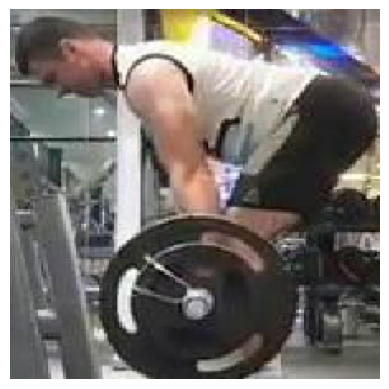

1/1 [==============================] - 1s 829ms/step
Lumbar Error: Yes
Torso Error: No


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_errors(model, image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 1 if prediction >= 0.5 else 0

# Load and display an image
test_image_path = lumbar_test_images[90]  # You can change this to any other image path
img = load_img(test_image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict errors
lumbar_error = predict_errors(lumbar_model, test_image_path)
torso_error = predict_errors(torso_model, test_image_path)

print(f"Lumbar Error: {'Yes' if lumbar_error else 'No'}")
print(f"Torso Error: {'Yes' if torso_error else 'No'}")


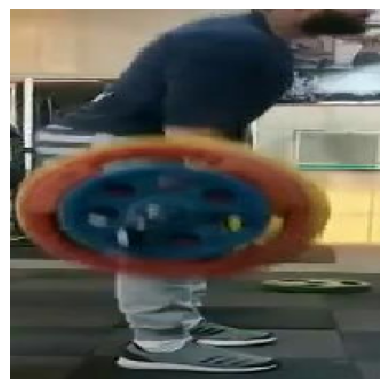

1/1 [==============================] - 0s 23ms/step
Lumbar Error: No
Torso Error: No


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_errors(model, image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 1 if prediction >= 0.5 else 0

# Load and display an image
test_image_path = lumbar_test_images[91]  # You can change this to any other image path
img = load_img(test_image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict errors
lumbar_error = predict_errors(lumbar_model, test_image_path)
torso_error = predict_errors(torso_model, test_image_path)

print(f"Lumbar Error: {'Yes' if lumbar_error else 'No'}")
print(f"Torso Error: {'Yes' if torso_error else 'No'}")


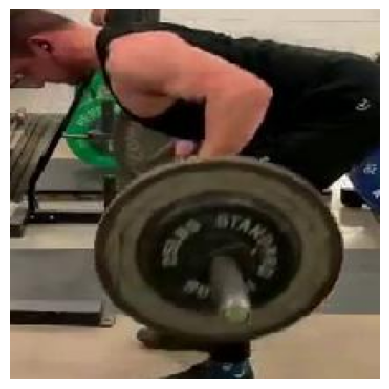

1/1 [==============================] - 0s 22ms/step
Lumbar Error: Yes
Torso Error: No


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_errors(model, image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 1 if prediction >= 0.5 else 0

# Load and display an image
test_image_path = lumbar_test_images[60]  # You can change this to any other image path
img = load_img(test_image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict errors
lumbar_error = predict_errors(lumbar_model, test_image_path)
torso_error = predict_errors(torso_model, test_image_path)

print(f"Lumbar Error: {'Yes' if lumbar_error else 'No'}")
print(f"Torso Error: {'Yes' if torso_error else 'No'}")


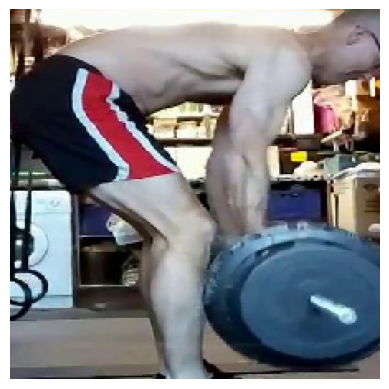

1/1 [==============================] - 0s 22ms/step
Lumbar Error: Yes
Torso Error: No


In [8]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_errors(model, image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 1 if prediction >= 0.5 else 0

# Load and display an image
test_image_path = lumbar_test_images[400]  # You can change this to any other image path
img = load_img(test_image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

# Predict errors
lumbar_error = predict_errors(lumbar_model, test_image_path)
torso_error = predict_errors(torso_model, test_image_path)

print(f"Lumbar Error: {'Yes' if lumbar_error else 'No'}")
print(f"Torso Error: {'Yes' if torso_error else 'No'}")


Found 2191 validated image filenames belonging to 2 classes.
Found 2585 validated image filenames belonging to 2 classes.
81/81 [==============================] - 7s 77ms/step


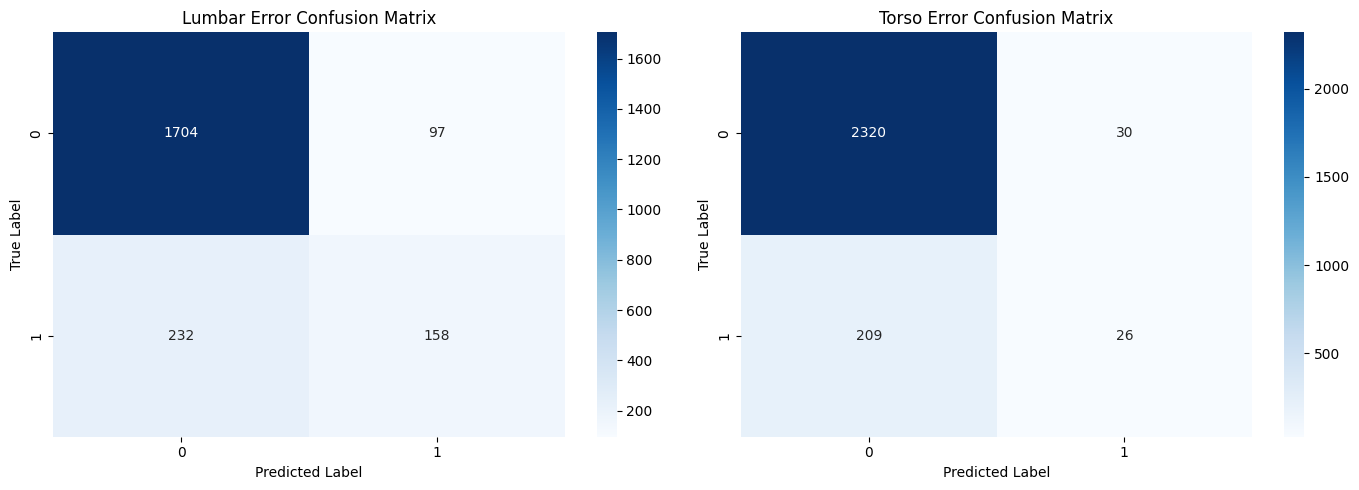

In [9]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the models
lumbar_model = load_model("/kaggle/working/lumbar_model.h5")
torso_model = load_model("/kaggle/working/torso_model.h5")

# Load the test images for lumbar and torso errors
lumbar_test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": lumbar_test_images, "label": lumbar_test_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size,
    shuffle=False
)

torso_test_generator = datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({"filename": torso_test_images, "label": torso_test_labels}),
    directory=None,
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    class_mode="binary",
    batch_size=batch_size,
    shuffle=False
)

# Get predictions
lumbar_predictions = (lumbar_model.predict(lumbar_test_generator) > 0.5).astype("int32")
torso_predictions = (torso_model.predict(torso_test_generator) > 0.5).astype("int32")

# Compute confusion matrices
lumbar_cm = confusion_matrix(lumbar_test_generator.classes, lumbar_predictions)
torso_cm = confusion_matrix(torso_test_generator.classes, torso_predictions)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(lumbar_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Lumbar Error Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(torso_cm, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Torso Error Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()
